# **Terrorism Around The World**


### **Terrorist Activities Around The World**

According to a survey, about 218 million people are affected by calamities, natural and man-made, per annum and about 68000 people loose their lives every year. The frequency of natural disasters like earthquakes, volcanoes, etc have remained broadly constant, but the number of terrorist activities have grown over the period.

The aim of this notebook is to explore the terrorist events around the world. Interactive Plots and Animations are used in this notebook, for making the exploration easy and more informative. This is my first try on Folium, which is a wrapper over the Leaflet.js API.Some things that we will explore are the trends in terrorism over the year, the terrorism prone areas, etc. Since it is a geographic dataset, you will see a lot of geomaps.


## **Contents**

**Terrorism Around The World**

- <a href='#Getting-Data-Ready'> 1.1 Getting Data Ready</a>
- <a href='#1.2 Some Basic Analysis'>1.2 Some Basic Analysis</a>
- 1.3 Global Terror Attacks<a href='#'></a>
- 1.4 Terrorism By Region<a href='#'></a>
- 1.5 Most Notorious Groups<a href='#'></a>
- 1.6 Terror Activities in India<a href='#'></a>
- 1.7 Terror Activities in USA<a href='#'></a>
- 1.8 Motive Behind Attacks<a href='#'></a>
- 1.9 World Terrorism Spread (Animation)<a href='#'></a>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import imread
import codecs
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

## Terrorism Around The World

The Year 2017 has witnessed about 1045 terror attacks till now, which has claimed 6000+ lives. According to a survey, there is atleast 1 terrorist attack taking place each day somewhere around the world. One such noxious attack took place at Las Vegas on 1st October 2017, claiming 59 lives and injuring 500+ people.

Terrorism implies the use of violence to terrorise a population or government for certain political, religious or ideological purpose. The threat of terrorism has become a worldwide concern with several parts of the world reeling under frequent terrorist strikes. With little concern for human lives, terrorists continue to strike with impunity, leaving a trail of death and destruction, wherever they choose to inflict their blows. 

In this dataset, we will be exploring the terror attacks over the world from 1970-2016, finding the most affected countries, the most notorious groups, their motives,etc.

## <a id='Getting-Data-Ready'>1.1 Getting Data Ready</a>

In [3]:
terror=pd.read_csv('data/global_terrorism.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

In [4]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

## <a id='1.2 Some Basic Analysis'>1.2 Some Basic Analysis </a>

In [5]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),
    'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [6]:
country_TA=terror['Country'].value_counts().index[0]

print('Country with Highest Terrorist Attacks:',country_TA)# terror['Country'].value_counts().index[0]
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),
    'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


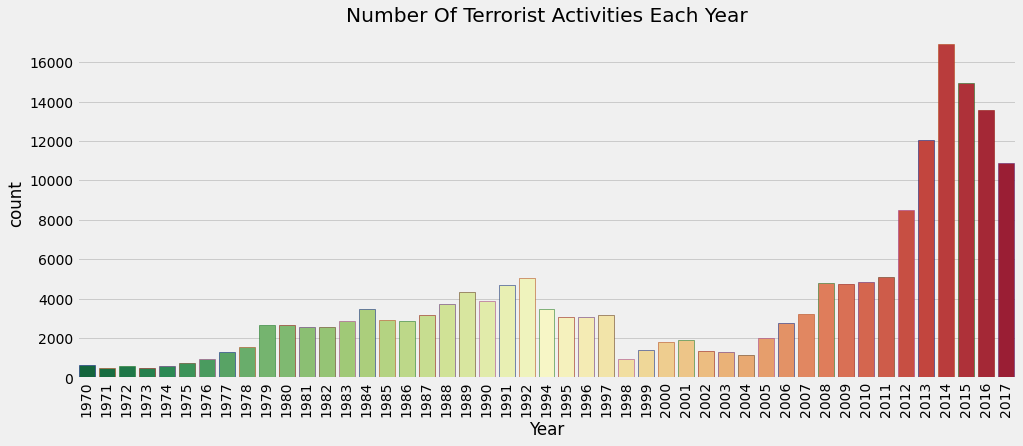

In [7]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Clearly the number of terrorist activities have gone up sharply after 2000.

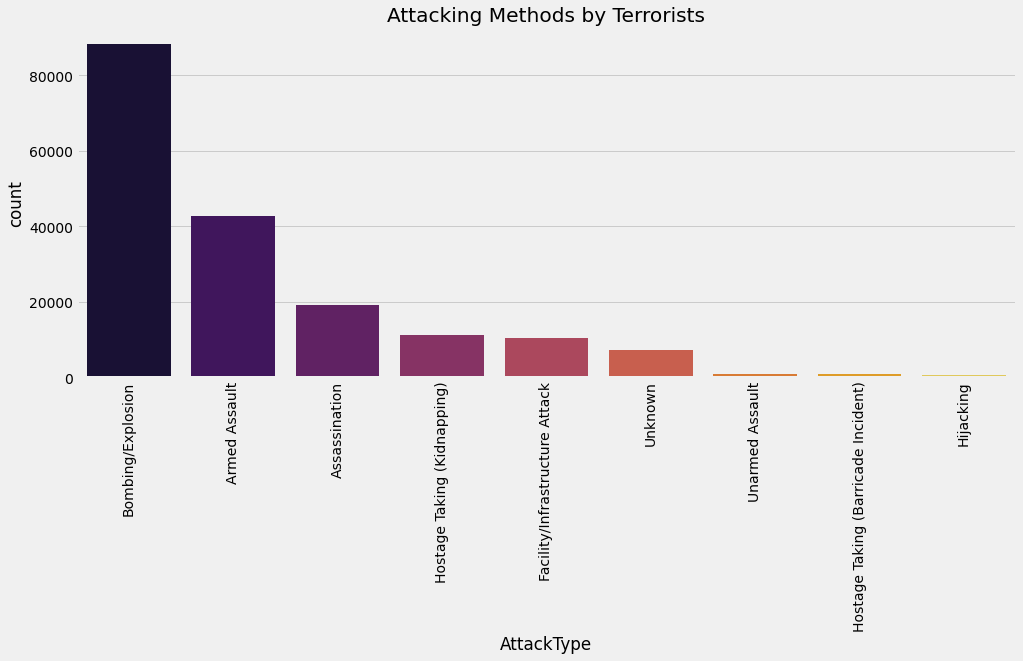

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

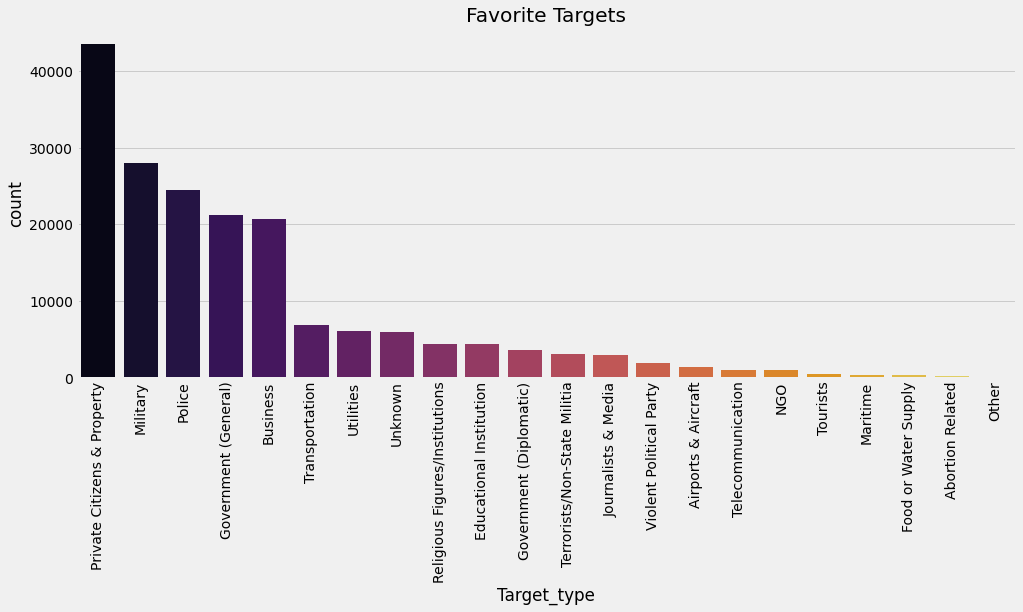

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

## <a id='1.3 Global Terror Attacks'>1.3 Global Terror Attacks </a>

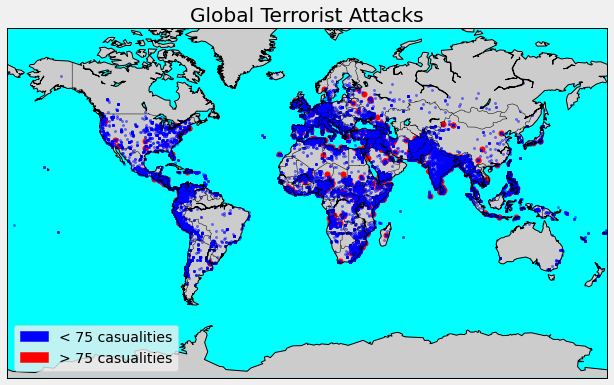

In [10]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities']>=75].latitude)
long_100=list(terror[terror['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(terror[terror['casualities']<75].latitude)
long_=list(terror[terror['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

## 1.3 Global Terror Attacks

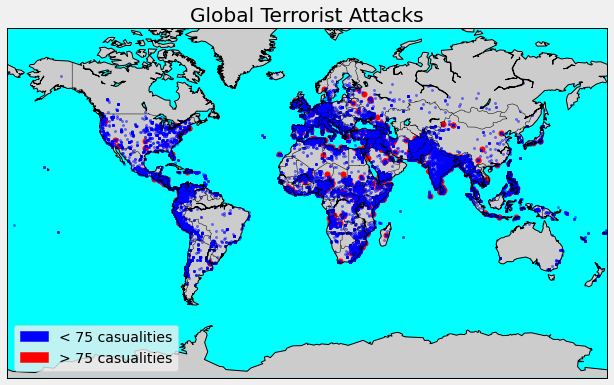

In [11]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities']>=75].latitude)
long_100=list(terror[terror['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(terror[terror['casualities']<75].latitude)
long_=list(terror[terror['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

The above basemap shows the places of attacks. The red circles are those that had more than 75 casualities(wounded+killed). Lets make an interactive map with Folium and get more information for each location.


In [12]:
# terror_fol=terror.copy()
# terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
# location_fol=terror_fol[['latitude','longitude']][:5000]
# country_fol=terror_fol['Country'][:5000]
# city_fol=terror_fol['city'][:5000]
# killed_fol=terror_fol['Killed'][:5000]
# wound_fol=terror_fol['Wounded'][:5000]
# def color_point(x):
#     if x>=30:
#         color='red'
#     elif ((x>0 and x<30)):
#         color='blue'
#     else:
#         color='green'
#     return color   
# def point_size(x):
#     if (x>30 and x<100):
#         size=2
#     elif (x>=100 and x<500):
#         size=8
#     elif x>=500:
#         size=16
#     else:
#         size=0.5
#     return size   
# map2 = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
# for point in location_fol.index:
#     info='<b>Country: </b>'+str(country_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
#     iframe = folium.IFrame(html=info, width=200, height=200)
#     folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map2)
# map2

The above basemap shows the places of attacks. The red circles are those that had more than 75 casualities(wounded+killed). Lets make an interactive map with Folium and get more information for each location.

In [13]:
terror_fol=terror.copy()
terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_fol=terror_fol[['latitude','longitude']][:5000]
country_fol=terror_fol['Country'][:5000]
city_fol=terror_fol['city'][:5000]
killed_fol=terror_fol['Killed'][:5000]
wound_fol=terror_fol['Wounded'][:5000]
def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='green'
    return color   
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   
map2 = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
for point in location_fol.index:
    info='<b>Country: </b>'+str(country_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map2)
map2

The color and size of each point is according to the number of people killed in the attack. Click on each point to get more information about the attack.

**Thank you for visiting my notebook. Do give a thumbs up if you enjoy reading and understaning this.**